In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
data = pd.read_csv('Advertising.csv',index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [71]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [72]:
data.shape

(200, 4)

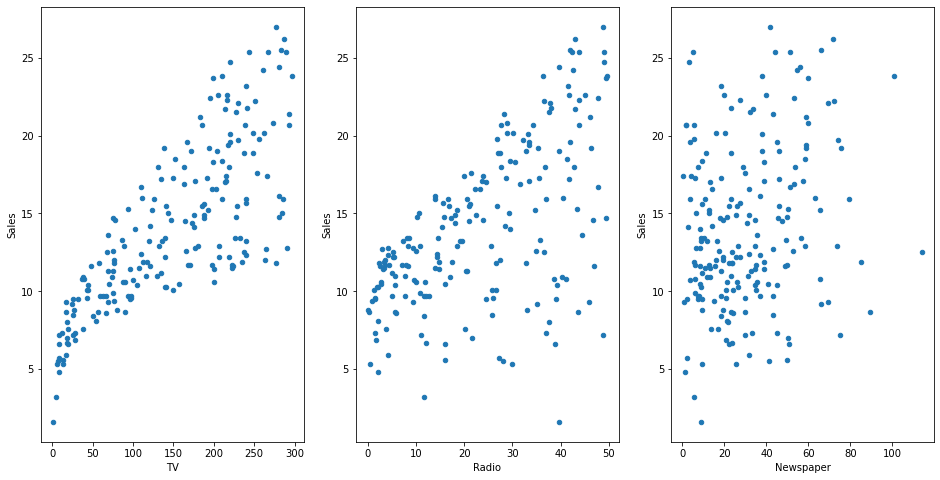

In [73]:
fig, axs = plt.subplots(1, 3)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16,8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2]);

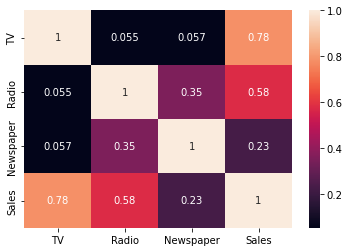

In [74]:
sns.heatmap(data.corr(), annot = True);

#### Selected any one feature from the three features

In [75]:
## I selected Tv. You can select others
features = data[['TV']].values
target = data[['Sales']].values

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 6)

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150, 1)
(50, 1)


In [79]:
# X_train = X_train.reshape(150,-1)
# X_train.shape

In [80]:
# X_test = X_test.reshape(50,-1)
# X_test.shape

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
my_first_model = LinearRegression()

At this stage my m and c values are initialized to some random value. We need to train the model to find the optimal value of the weights(parameters) of the Linear Regression model.

In [83]:
my_first_model.fit(X_train,y_train)

LinearRegression()

In [84]:
my_first_model.coef_

array([[0.04873499]])

In [85]:
my_first_model.intercept_

array([6.70910349])

Interpreting the coefficients

1. A unit increase in TV ad spending was associated with a .048 unit increase in Sales

OR 

An additional 1000 $ spent on TV was associated with an increase in sales of 48.734 units 

y = mx + c

You have the values of m and c. Given any value of x you can predict the value of y

In a new market my spend on TV is $50,000. I want you to tell me the sales generated due to this spend

In [86]:
.048*50 + 6.709

9.109

Lets try to plot best fit line

In [87]:
X_new = pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [88]:
preds = my_first_model.predict(X_new)

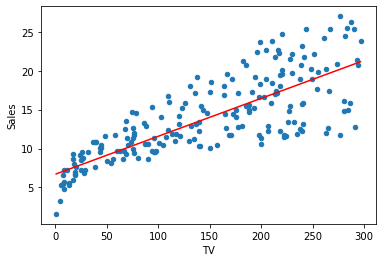

In [89]:
data.plot(kind='scatter', x='TV', y='Sales')
plt.plot(X_new,preds,c='red');

In [90]:
import statsmodels.formula.api as smf

In [91]:
my_stat_model = smf.ols(formula='Sales ~ TV', data=data).fit()
my_stat_model.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

H0 : There is no relationship between independent(TV) variable and dependent(sales) variable

H1 : There is a relationship between independent(TV) variable and dependent(Sales) variable

if my p value for TV is less than .05 then I will reject the null hypothesis

In [92]:
my_stat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           1.47e-42
Time:                        20:07:38   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To complete the supervised learning flow follow the below steps after fitting the model

In [100]:
my_model_preds = my_first_model.predict(X_test)
my_model_preds[1]

array([17.17250484])

In [94]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [95]:
#MAE
mean_absolute_error(my_model_preds,y_test)

2.469197684055691

In [96]:
#MSE
mean_squared_error(my_model_preds,y_test)

9.503191696866343

In [97]:
#RMSE
np.sqrt(mean_squared_error(my_model_preds,y_test))

3.0827247196054244

In [98]:
#R Squared
my_first_model.score(X_test,y_test)

0.5600153407297688